In [27]:
# Reading a file
cars = open(r'C:\Users\srika\Documents\medium\cars.csv', "r")
#print(cars.read()) 

In [30]:
# Good practice to close it afterwards
cars.close()

In [35]:
!python --version

Python 3.7.6


In [43]:
!pip install pandas

In [33]:
import pandas as pd
cars_df = pd.read_csv(r'C:\Users\srika\Documents\medium\cars.csv')

In [41]:
cars_df2 = pd.read_csv(r'C:\Users\srika\Documents\medium\cars.csv',delimiter=',')

In [42]:
cars_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [5]:
cars_df.shape

(428, 15)

In [7]:
cars_df.head(n=10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [8]:
cars_df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [16]:
cars_df.groupby(['Type']).count()

,Make,Model,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Type,,,,,,,,,,,,,,
Hybrid,3,3,3,3,3,3,3,3,3,3,3,3,3,3
SUV,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Sedan,262,262,262,262,262,262,262,262,262,262,262,262,262,262
Sports,49,49,49,49,49,49,49,47,49,49,49,49,49,49
Truck,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Wagon,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [59]:
cars_group = cars_df.groupby(['Type']).agg({'Weight':'sum'})
cars_group["Percent"]=cars_group.apply(lambda x:  100*x / x.sum())
cars_group

,Weight,Percent
Type,,
Hybrid,7472,0.487931
SUV,266666,17.413626
Sedan,890555,58.154364
Sports,161489,10.545435
Truck,102018,6.661904
Wagon,103164,6.736739


In [49]:
cars_df.groupby(['Type']).agg({'Weight':'mean'})

,Weight
Type,
Hybrid,2490.666667
SUV,4444.433333
Sedan,3399.064885
Sports,3295.693878
Truck,4250.750000
Wagon,3438.800000


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

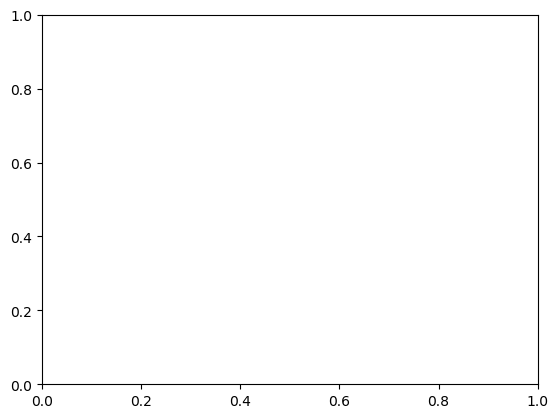

In [74]:
plt.rcdefaults()
fig, ax = plt.subplots()

In [84]:
cars_grouped=cars_df.groupby(['Type'])['Make'].count()

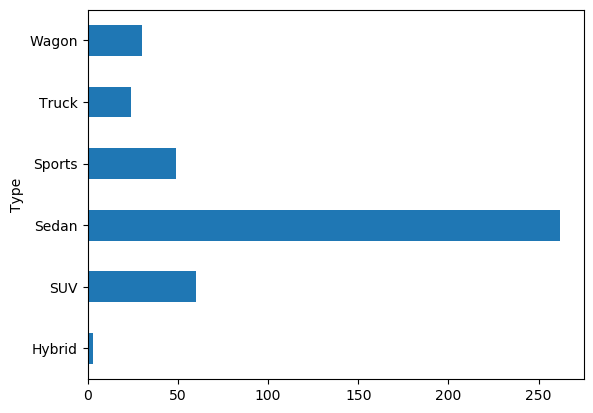

In [85]:
cars_grouped.plot(x ='Type', kind = 'barh',stacked=True)
plt.show()